In [1]:
#import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#read the data file
rawdata_df = pd.read_csv('diabetes.csv', na_values = "?", engine='python')

In [3]:
#shape of the dataframe
rawdata_df.shape

(101766, 50)

In [4]:
#make a copy of the dataframe
cleandata_df = rawdata_df.copy()

#checking for the number of missing values per feature (if > 0)
for x in cleandata_df.columns:
    is_object = cleandata_df[x].dtype
    if (is_object == object and 
        cleandata_df[x][cleandata_df[x] == '?'].count() > 0):
        print(x,': % missing values - ', 
              cleandata_df[x][cleandata_df[x] == '?'].count()*100/cleandata_df[x].count())

In [5]:
#drop the feature 'weight'
cleandata_df.drop(['weight'], inplace = True, axis = 1)

In [6]:
#check the shape again 
cleandata_df.shape

(101766, 49)

In [7]:
#replace missing values with NaN
cleandata_df.replace('Unknown/Invalid', np.NaN, inplace = True)

In [8]:
#checking if '?'s are replaced with NaN
for z in cleandata_df.columns:
    is_object1 = cleandata_df[z].dtype
    if is_object1 == object and cleandata_df[z][cleandata_df[z] == '?'].count() > 0:
        print(z, ': % missing values - ', cleandata_df[z][cleandata_df[z] == '?'].count()*100/cleandata_df[z].count())

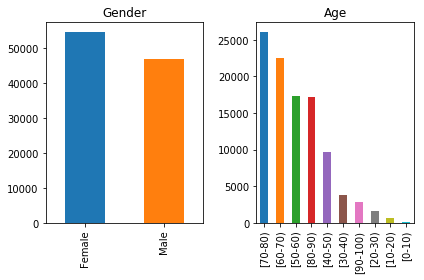

In [9]:
#histograms of categorical data
plt.subplot(1,2,1)
cleandata_df['gender'].value_counts().plot(kind = 'bar')
plt.title('Gender')

plt.subplot(1,2,2)
cleandata_df['age'].value_counts().plot(kind = 'bar')
plt.title('Age')

plt.tight_layout()
plt.show()

In [10]:
#converting 'readmitted' column to category type before one hot encoding
cleandata_df['readmitted'] = cleandata_df['readmitted'].astype('category')
print(cleandata_df['readmitted'].dtype)

category


In [11]:
#recoding using one hot encoding on the feature 'readmitted' (our target will be readmitted < 30 days)
cleandata_df = pd.concat([cleandata_df, pd.get_dummies(cleandata_df['readmitted'], prefix='readmitted')], axis = 1)

In [12]:
#check if the encoding worked
print(cleandata_df.shape)
cleandata_df.head()

(101766, 52)


encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code      ...      glipizide-metformin  \
0                 1        NaN      ...                       No   
1                 3        NaN      ...                       No   
2                 2        NaN      ...                       No   
3                 2        NaN      ...                       No   
4                 1        NaN      ...                       No   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  \
0                        No                       No                      No   
1                        No                       No                      No   
2                        No                       No                      No   
3                        No                       No                      No   
4                        No                       No                      No   

   change  diabetesMed  readmitted readmitted_<30 readmitted_>30 readmitted_NO  
0      No           No          NO              0              0             1  
1      Ch          Yes         >30              0              1             0  
2      No          Yes          NO              0              0             1  
3      Ch          Yes          NO              0              0             1  
4      Ch          Yes          NO              0              0             1  

[5 rows x 52 columns]

In [13]:
#encounter ids should be unique (making sure data is tidy)
print(cleandata_df['encounter_id'].value_counts().sort_values(ascending = False).head(5))

77856768     1
10522770     1
316026950    1
285262104    1
44171328     1
Name: encounter_id, dtype: int64
